# Saving and Loading Results

For larger experiments, it is useful to be able to save the experiment results object for later analysis. This can be done with the results object's `save_results` function.

In [1]:
# Usual Imports
%matplotlib inline
import os
from sklearn.ensemble import RandomForestClassifier

from decompose.experiments import BVDExperiment
from decompose import plotting_utils

from decompose.data_utils import load_standard_dataset

if not os.path.exists("data"):
    os.mkdir("data")

### Saving and Loading Results Objects

In [6]:
n_trials = 20
# Load the training data
train_data, train_labels, test_data, test_labels = load_standard_dataset("digits", frac_training=0.5, label_noise=0.3)

# Describe the ensemble we want to investigate
rf_classifier = RandomForestClassifier(n_estimators=5)

# Define experiment varying max depth and looking at the 0-1 loss
experiment = BVDExperiment(rf_classifier,
                           loss="cross_entropy",
                           parameter_name="max_depth",
                           parameter_values=range(1,18,1))

results = experiment.run_experiment(train_data, train_labels, test_data, test_labels, n_trials=n_trials)
results.save_results("data/examples_3_results.pkl")

# To show that we are loading from the hard drive, we now delete the results object from memory
del(results)

100%|██████████| 17/17 [00:09<00:00,  1.87it/s]


<AxesSubplot:xlabel='max depth'>

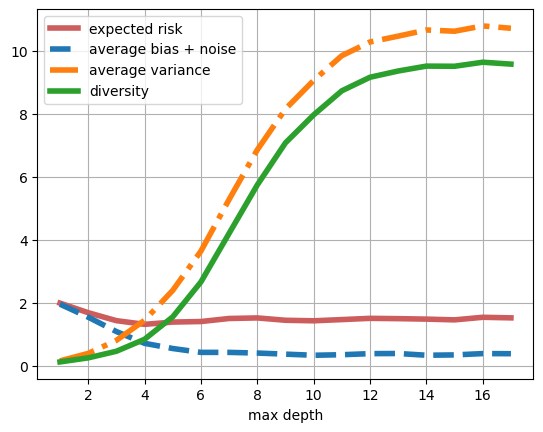

In [7]:
from decompose.experiments import load_results

results = load_results("data/examples_3_results.pkl")

# plot bias-variance-diversity components
plotting_utils.plot_bvd(results, x_label="max depth", integer_x=True)

## Saving Test Predictions

By default, experiment objects store only the statistics of the decomposition, not the predictions of the models themselves from which the statistics are derived.

An advanced feature of the `BVDExperiment` object is that it makes it possible to access the predictions of the individual ensemble members on the test splits.
To do this requires an option to be set in `BVDExperiment` before running the experiment.

In [8]:
n_trials = 10
# Load the training data
train_data, train_labels, test_data, test_labels = load_standard_dataset("digits", frac_training=0.5, label_noise=0.3)

# Describe the ensemble we want to investigate
rf_classifier = RandomForestClassifier(n_estimators=5)

# verify that the directory for decomposition_objects exists
import os
if not os.path.exists("decomposition_objects"):
    os.mkdir("decomposition_objects")

# Define experiment varying max depth and looking at the 0-1 loss
experiment = BVDExperiment(rf_classifier, "cross_entropy", parameter_name="max_depth",
                           parameter_values=range(1,18,1),
                           save_decompositions=True,
                           decompositions_prefix="decomposition_objects/examples_3")

results = experiment.run_experiment(train_data, train_labels, test_data, test_labels, n_trials=n_trials)
results.save_results("data/examples_3_w_decomps_results.pkl")

100%|██████████| 17/17 [00:04<00:00,  3.66it/s]


In [9]:

results = load_results("data/examples_3_w_decomps_results.pkl")
# Say we want the predictions from depth 1 trees (index 0), on the second split of the test data (index 1).
decomp = results.get_decomposition_object(0, 0)

# We can access the individual model predictions through the decomp object
print(decomp.pred.shape)
# As expected, we see a numpy array of size (n_trials, ensemble_size, test_set_size, n_classes)

(10, 5, 899, 10)
